In [1]:
import altair as alt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

# Exploratory data analysis of Crime in Vancouver #

The data set used in this project comes from **the Vancouver Open Data Catalogue**. It includes 529.652 crimes reported between January 1, 2003 to July 13, 2017. The data set is also avialable on <https://www.kaggle.com/wosaku/crime-in-vancouver>

In [2]:
df = pd.read_csv('../data/raw/crime.csv')

### Split data into train set and test set

In [3]:
train_df, test_df = train_test_split(df, test_size=0.20, random_state=123)

## Peak of the data ##

In [4]:
print(f"The train dataset has {train_df.shape[0]} rows and {train_df.shape[1]} variables ")

The train dataset has 424521 rows and 12 variables 


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424521 entries, 470507 to 277869
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TYPE           424521 non-null  object 
 1   YEAR           424521 non-null  int64  
 2   MONTH          424521 non-null  int64  
 3   DAY            424521 non-null  int64  
 4   HOUR           380829 non-null  float64
 5   MINUTE         380829 non-null  float64
 6   HUNDRED_BLOCK  424510 non-null  object 
 7   NEIGHBOURHOOD  379002 non-null  object 
 8   X              424521 non-null  float64
 9   Y              424521 non-null  float64
 10  Latitude       424521 non-null  float64
 11  Longitude      424521 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 42.1+ MB


In [6]:
print(f"Vancouver has {train_df['NEIGHBOURHOOD'].nunique()} neighborhoods, and they are")

Vancouver has 24 neighborhoods, and they are


In [7]:
train_df['NEIGHBOURHOOD'].unique()

array(['Strathcona', nan, 'Sunset', 'Hastings-Sunrise',
       'Central Business District', 'Grandview-Woodland', 'Fairview',
       'Victoria-Fraserview', 'Kitsilano', 'Kensington-Cedar Cottage',
       'Marpole', 'Mount Pleasant', 'West End', 'Renfrew-Collingwood',
       'Riley Park', 'South Cambie', 'Oakridge', 'Kerrisdale',
       'Arbutus Ridge', 'Killarney', 'Shaughnessy', 'West Point Grey',
       'Dunbar-Southlands', 'Stanley Park', 'Musqueam'], dtype=object)

In [8]:
print(
    f"dataset has information for {train_df['YEAR'].nunique()} years. From {train_df['YEAR'].unique().min()} to {train_df['YEAR'].unique().max()}"
)

dataset has information for 15 years. From 2003 to 2017


In [9]:
numerics = train_df.select_dtypes(include=np.number).columns.tolist()

train_df[numerics].describe()

,YEAR,MONTH,DAY,HOUR,MINUTE,X,Y,Latitude,Longitude
count,424521.000000,424521.000000,424521.000000,380829.000000,380829.000000,424521.000000,4.245210e+05,424521.000000,424521.000000
mean,2009.200042,6.448948,15.413391,13.709297,16.921083,441569.765901,4.895062e+06,44.192548,-110.436553
std,4.386250,3.399422,8.753858,6.769816,18.419551,149589.664478,1.658040e+06,14.968764,37.406710
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-124.549757
25%,2005.000000,4.000000,8.000000,9.000000,0.000000,489932.310000,5.453645e+06,49.235537,-123.127181
50%,2009.000000,6.000000,15.000000,15.000000,10.000000,491496.410000,5.456841e+06,49.264254,-123.107128
75%,2013.000000,9.000000,23.000000,19.000000,30.000000,493558.610000,5.458637e+06,49.280433,-123.065850
max,2017.000000,12.000000,31.000000,23.000000,59.000000,511303.000000,5.512579e+06,49.755314,0.000000


In [10]:
# TODO print('We need data preproccessing')

## Explore trends, relationships and more ##

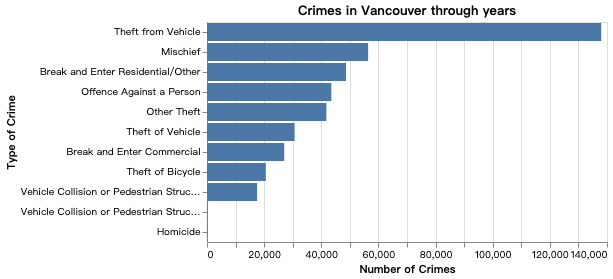

In [11]:
alt.Chart(train_df, title='Crimes in Vancouver through years').mark_bar().encode(
    y=alt.Y('TYPE', sort='-x', title='Type of Crime'),
    x=alt.X('count()', title='Number of Crimes'))

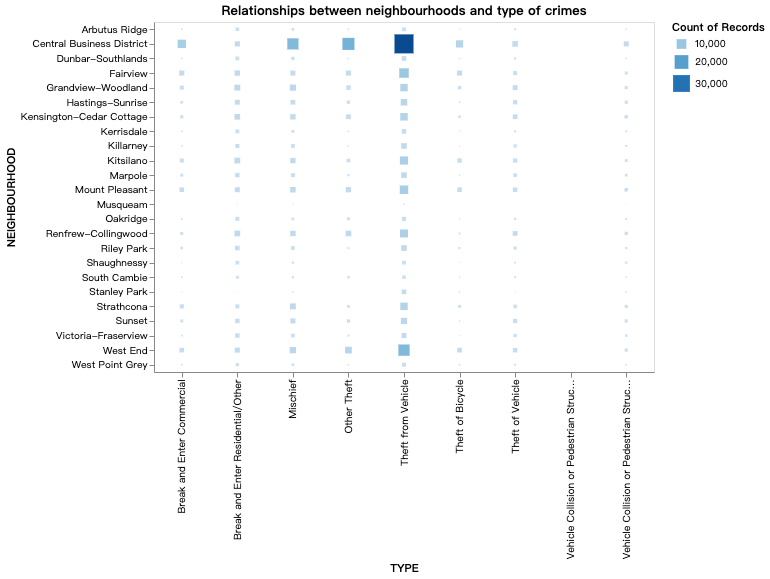

In [12]:
alt.Chart(train_df.dropna(), 
          title = "Relationships between neighbourhoods and type of crimes"
         ).mark_square().encode(
    x='TYPE',
    y='NEIGHBOURHOOD',
    color='count()',
    size='count()').properties(
    width=500,
    height=350
)

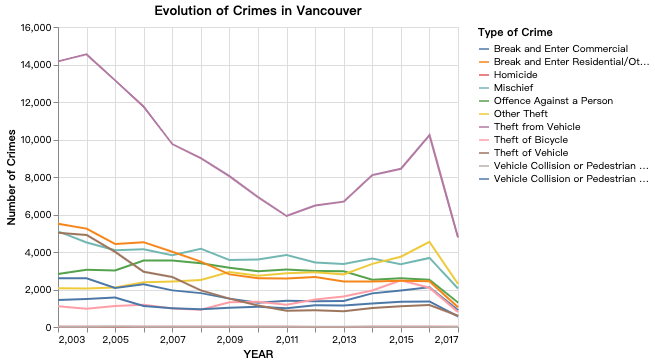

In [13]:
alt.Chart(train_df,title ='Evolution of Crimes in Vancouver').mark_line().encode(
    x=alt.X('YEAR'),
    y=alt.Y('count(YEAR)', title ='Number of Crimes'),
    color=alt.Color('TYPE', title='Type of Crime'))

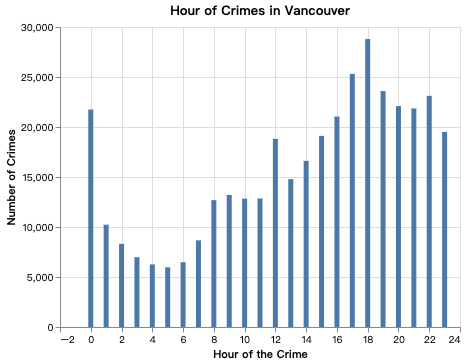

In [14]:
alt.Chart(train_df, title='Hour of Crimes in Vancouver').mark_bar(clip=True).encode(
    x=alt.X('HOUR', title='Hour of the Crime', scale=alt.Scale(domain=(0, 23))),
    y=alt.Y('count()', title='Number of Crimes'))

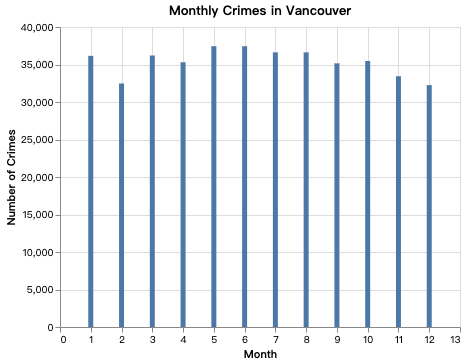

In [15]:
alt.Chart(train_df, title='Monthly Crimes in Vancouver').mark_bar(clip=True).encode(
    x=alt.X('MONTH', title='Month'),
    y=alt.Y('count()', title='Number of Crimes'))

In [16]:
# data['HUNDRED_BLOCK'].nunique()

In [17]:
%load_ext rpy2.ipython

In [18]:
%%R
library(tidyverse)
library(knitr)
library(ggridges)
library(ggthemes)
library(ggplot2)
theme_set(theme_gray(base_size = 18))

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Import train data into R for further EDA

In [19]:
%%R -i train_df
train_df |> head()
#crime_data <- read.csv("../data/raw/crime.csv")

                             TYPE YEAR MONTH DAY HOUR MINUTE
470507                   Mischief 2015     1   6    9     45
82555    Offence Against a Person 2004     2   1  NaN    NaN
463572                Other Theft 2015    10   5   14     44
451674         Theft from Vehicle 2015    11  29    1      0
2725   Break and Enter Commercial 2003    10  25   17      0
306666   Offence Against a Person 2010    11  18  NaN    NaN
                   HUNDRED_BLOCK             NEIGHBOURHOOD        X       Y
470507         8XX E HASTINGS ST                Strathcona 493735.8 5458710
82555  OFFSET TO PROTECT PRIVACY                      <NA>      0.0       0
463572          3XX SE MARINE DR                    Sunset 492774.3 5450883
451674         25XX KITCHENER ST          Hastings-Sunrise 496116.1 5457733
2725            11XX MELVILLE ST Central Business District 491077.0 5459365
306666 OFFSET TO PROTECT PRIVACY                      <NA>      0.0       0
       Latitude Longitude
470507 49.28111

**Below table shows the type of crime with its reported times, as well as percentage**

In [20]:
%%R
type_crime <- train_df |> 
  group_by(TYPE) |> 
  summarise(Count = n()) |> 
  mutate(Percentage=paste0(round(Count/sum(Count)*100,2),"%")) |> 
  arrange(desc(Count))
type_crime

# A tibble: 11 × 3
   TYPE                                                    Count Percentage
   <chr>                                                   <int> <chr>     
 1 Theft from Vehicle                                     137982 32.5%     
 2 Mischief                                                56394 13.28%    
 3 Break and Enter Residential/Other                       48669 11.46%    
 4 Offence Against a Person                                43509 10.25%    
 5 Other Theft                                             41784 9.84%     
 6 Theft of Vehicle                                        30660 7.22%     
 7 Break and Enter Commercial                              27027 6.37%     
 8 Theft of Bicycle                                        20597 4.85%     
 9 Vehicle Collision or Pedestrian Struck (with Injury)    17522 4.13%     
10 Vehicle Collision or Pedestrian Struck (with Fatality)    194 0.05%     
11 Homicide                                                  183 0.04

**By visualization**

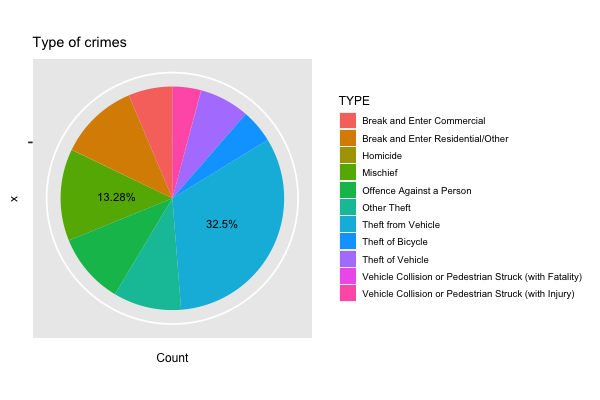

In [21]:
%%R -w 600 -h 400
ggplot(type_crime, aes(x = "", y = Count, fill = TYPE)) +
  geom_col() +
  geom_text(aes(label = ifelse(Count > 50000, Percentage, "")),
            position = position_stack(vjust = 0.5),
            show.legend = FALSE,
            size = 4) +
  coord_polar(theta = "y") +
  scale_y_discrete() +
  theme(text = element_text(size = 12)) +
  ggtitle("Type of crimes")

**Below table and visualization show the number of crimes per neighbourhood**

In [22]:
%%R
# Count Neighbourhood with most crimes
neighbour_crime <- train_df |> 
  group_by(NEIGHBOURHOOD) |> 
  summarize(Count = n()) |> 
  arrange(desc(Count))

neighbour_crime[-c(2),] # Remove crime without Neighbourhood data

# A tibble: 24 × 2
   NEIGHBOURHOOD             Count
   <chr>                     <int>
 1 Central Business District 88742
 2 West End                  33012
 3 Fairview                  25689
 4 Mount Pleasant            24281
 5 Grandview-Woodland        21879
 6 Renfrew-Collingwood       21546
 7 Kitsilano                 21396
 8 Kensington-Cedar Cottage  19838
 9 Strathcona                16807
10 Hastings-Sunrise          14450
# … with 14 more rows


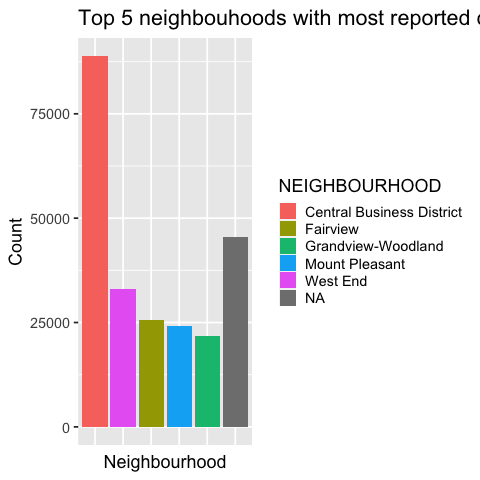

In [23]:
%%R
top_5_district <- head(neighbour_crime)
ggplot(top_5_district) +
  geom_bar(aes(x = reorder(NEIGHBOURHOOD, -Count),
               y = Count, fill=NEIGHBOURHOOD), 
           stat = "identity") +
  theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank()) +
  xlab("Neighbourhood") +
  ggtitle("Top 5 neighbouhoods with most reported crimes")